<a href="https://colab.research.google.com/github/Abijimzz/Abijimzz/blob/main/1ra_evaluacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerías

In [7]:
import numpy as np
import sklearn
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

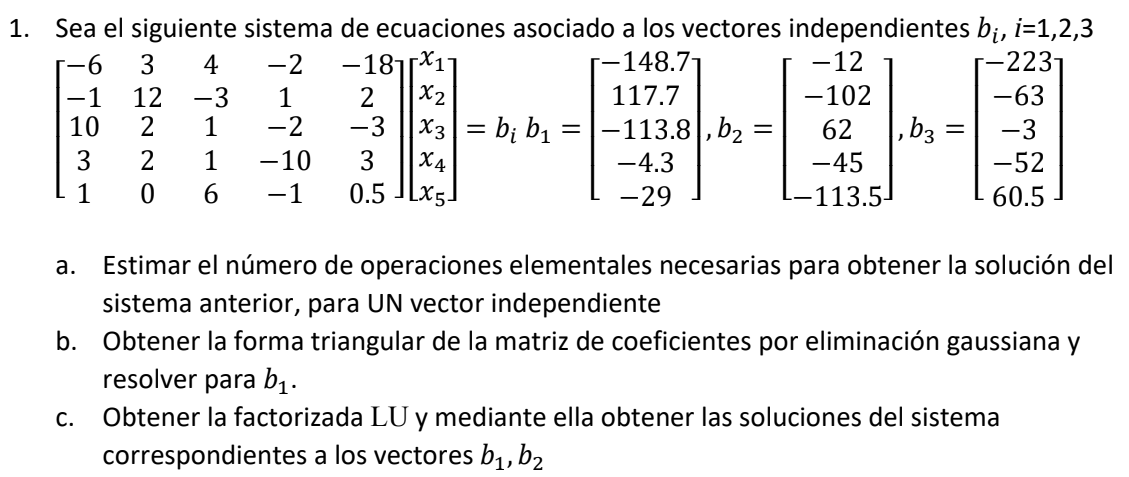



a. El coste del método de Gauss-Jordan es $n^3 + n^2 − 2n$, a falta de añadir n divisiones para calcular las incógnitas.

b.

In [ ]:
matriz = np.array([[-6,3,4,-2,-18],[-1,12,-3,1,2],[10,2,1,-2,-3],[3,2,1,-10,3],[1,0,6,-1,0.5]])
b = np.array([[-148.7],[117.7],[-113.8],[-4.3],[-29]])

In [ ]:
def sol(A,b):
    A = np.concatenate((A,b),axis=1)
    size = np.shape(A)
    n = size[0]
    m = size[1]
    x = np.zeros((n))
    
    #Triangulazión, técnicas de pivoteo
    for i in range(0,n-1):
        pivote   = A[i,i]
        adelante = i + 1
        for k in range(adelante,n,1):
            factor  = A[k,i]/pivote
            A[k,:] = A[k,:] - A[i,:]*factor
    
    # Sustitución hacia atrás
    for r in range(n-1,-1,-1):
        summ =0
        for c in range(r+1,m-1):
             summ += x[c]*A[r,c]
        y=A[r,m-1]
        x[r]=(y-summ)/A[r,r]
    print("Solucion X =",x)

In [ ]:
sol(matriz,b)

Solucion X = [-8.5  6.1 -4.   2.  11. ]


c.

In [3]:
matriz = np.array([[-6,3,4,-2,-18],[-1,12,-3,1,2],[10,2,1,-2,-3],[3,2,1,-10,3],[1,0,6,-1,0.5]])
b1 = np.array([-148.7,117.7,-113.8,-4.3,-29])
b2 =  np.array([-12,-102,62,-45,-113.5])

In [4]:
#Factorizacion LU
m=len(matriz)
u=np.zeros([m,m]) #matriz upper
l=np.zeros([m,m]) #matriz lower
x = np.zeros((m)) #vector sol
y = np.zeros((m))
#Ceros debajo de la diagonal
for k in range(0,m): #pivote
    for r in range (0,m): #renglones
        if (k==r):
            l[k,r]=1 #diagonal de unos
        elif (k<r):
            if (matriz[k,k]==0): #condicion extra para que no haya division sobre cero
                l[r,c]=0
            else:
                factor=(matriz[r,k]/matriz[k,k])
                l[r,k]=factor
            for c in range(0,m):
                matriz[r,c]=matriz[r,c]-(factor*matriz[k,c])
                u[r,c]=matriz[r,c]
                u[0,c]=matriz[0,c]
print("Matriz resultante")
print("Matriz L")
print(l)
print("Matriz U")
print(u)

Matriz resultante
Matriz L
[[ 1.          0.          0.          0.          0.        ]
 [ 0.16666667  1.          0.          0.          0.        ]
 [-1.66666667  0.60869565  1.          0.          0.        ]
 [-0.5         0.30434783  0.41581259  1.          0.        ]
 [-0.16666667  0.04347826  0.68960469 -0.32158809  1.        ]]
Matriz U
[[ -6.           3.           4.          -2.         -18.        ]
 [  0.          11.5         -3.66666667   1.33333333   5.        ]
 [  0.           0.           9.89855072  -6.14492754 -36.04347826]
 [  0.           0.           0.          -8.85065886   7.46559297]
 [  0.           0.           0.           0.          24.53920596]]


In [5]:
def sol(l,u,b):    
  #Sustitución hacia adelante
    for r in range(m):
        summ =0
        for c in range(r):
            summ += y[c]*l[r,c]
        y[r] = (b[r]-summ)/l[r,r]
    
    #Sustitución hacia atrás
    for r in range(m-1,-1,-1):
        summ =0
        for c in range(r+1,m):
            summ += x[c]*u[r,c]
        x[r]=(y[r]-summ)/u[r,r]
    print("Solucion X=")
    print(x)

In [6]:
sol(l,u,b1)
sol(l,u,b2)

Solucion X=
[-8.5  6.1 -4.   2.  11. ]
Solucion X=
[  7.98855666 -11.3575548  -19.52769492   0.19713562  -8.25050307]


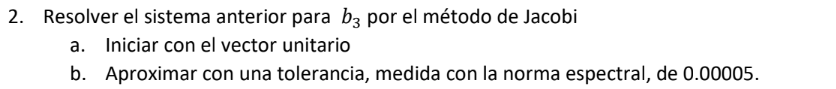

In [ ]:
A = np.array([[10, 2, 1, -2, -3],
              [-1, 12, -3, 1, 2],
              [1, 0, 6, -1, 0.5],
              [3, 2, 1, -10, 3],
              [-6, 3, 4, -2, -18]])

b = np.array([-3, -63, 60.5, -52, -223])

print("Sistema: ")
print(A)
print("Vector independiente: ")
print(b)

x = np.zeros_like(b)
for it_count in range(100):
    temp = np.zeros_like(x)

    for i in range(A.shape[0]):
        s1 = A[i, :i] @ x[:i] 
        s2 = A[i, i + 1:] @ x[i + 1:]
        temp[i] = (b[i] - s1 - s2) / A[i, i]
        if temp[i] == temp[i-1]:
            break

    if np.allclose(x, temp, atol=0.00005, rtol=0.):
        break
    x = temp

print("Solucion:")
print(x)

Sistema: 
[[ 10.    2.    1.   -2.   -3. ]
 [ -1.   12.   -3.    1.    2. ]
 [  1.    0.    6.   -1.    0.5]
 [  3.    2.    1.  -10.    3. ]
 [ -6.    3.    4.   -2.  -18. ]]
Vector independiente: 
[  -3.   -63.    60.5  -52.  -223. ]
Solucion:
[ 4.99997973 -4.99998655 10.00000473  9.99998446 10.99998676]


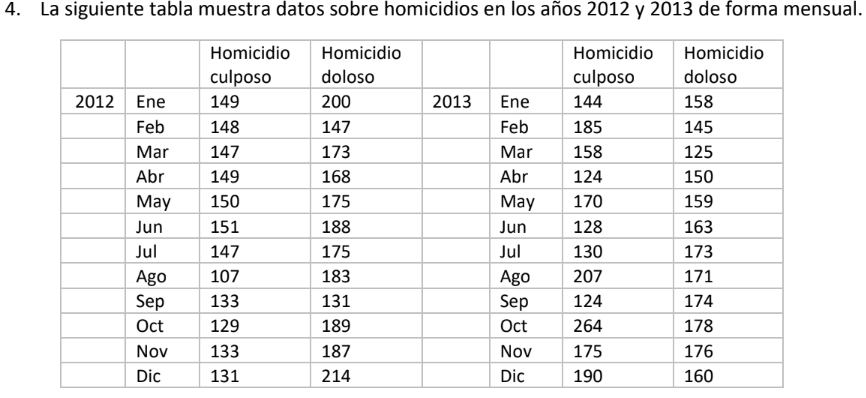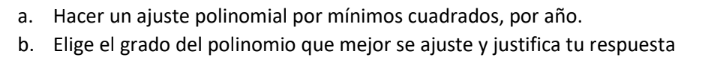

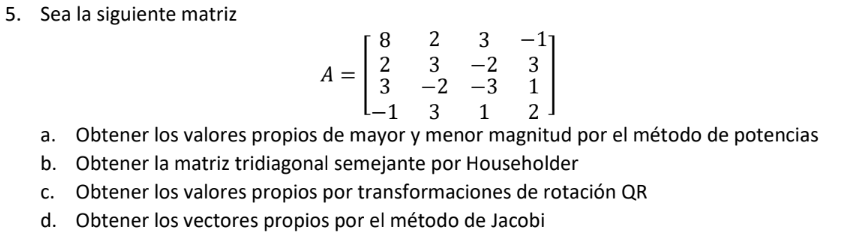

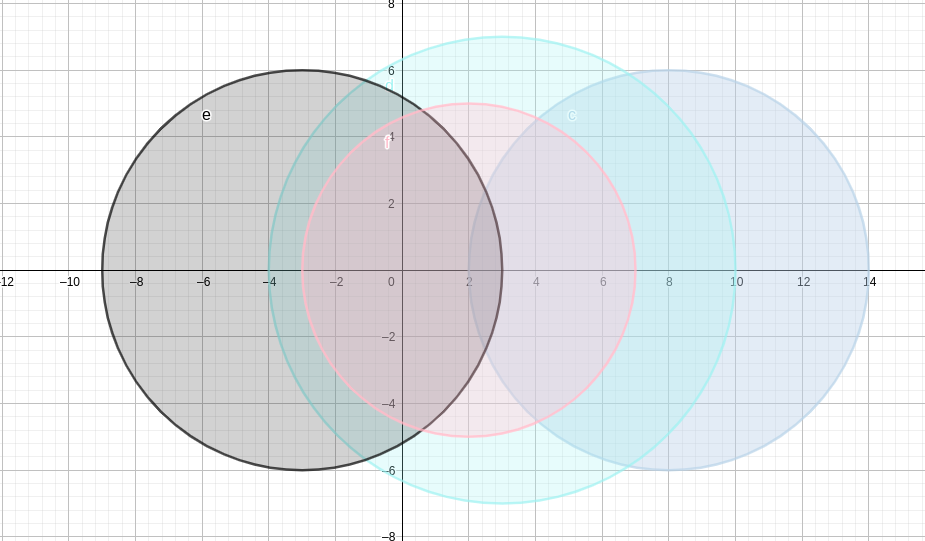

a.Obtener los valores propios de mayor y menor magnitud por el método de potencias

In [25]:
A = np.array([[8,2,3,-1],[2,3,-2,3],[3,-2,-3,1],[-1,3,1,2]])
x0 = np.array([1,1,1,1])

In [9]:
eigenvalue, featurevector = np.linalg.eig(A)
print(eigenvalue)

[-5.25148109  9.13243947  5.53935554  0.57968608]


In [11]:
def potencias(A,x0):
    tol = .01
    k = 0
    lam0 = np.linalg.norm(x0)
    while (tol>.00005):
        x1 = np.dot(A,x0)
        k= k+1
        lam1 = np.linalg.norm(x1)
        tol = abs(lam1-lam0)
        print(f'iteracion {k},{x0},valor propio de interés: {lam1},tol')
        x0 = x1/lam1
        lam0 = lam1

In [12]:
potencias(A,x0)

iteracion 1,[1 1 1 1],valor propio de interés: 14.352700094407323,tol
iteracion 2,[ 0.83607962  0.41803981 -0.0696733   0.34836651],valor propio de interés: 8.456054302624365,tol
iteracion 3,[0.82394577 0.486128   0.26366265 0.12359186],valor propio de interés: 8.857654588349973,tol
iteracion 4,[0.9292774  0.33301432 0.09395097 0.12929886],valor propio de interés: 9.028505024966373,tol
iteracion 5,[0.91408288 0.33865988 0.21811468 0.04677566],valor propio de interés: 9.094303846720472,tol
iteracion 6,[0.9453776  0.2802021  0.16024981 0.04547492],valor propio de interés: 9.11859197613063,tol
iteracion 7,[0.93859881 0.27935087 0.20183534 0.01605822],valor propio de interés: 9.127425330404566,tol
iteracion 8,[0.94845366 0.25853449 0.18270726 0.01461591],valor propio de interés: 9.130623958866913,tol
iteracion 9,[0.94606942 0.25747901 0.19656774 0.00428107],valor propio de interés: 9.131781535990214,tol
iteracion 10,[0.94931482 0.25014654 0.19030548 0.00344922],valor propio de interés: 9.1

In [18]:
A_inv = np.linalg.inv(A)
eigenvalue, featurevector = np.linalg.eig(A_inv)
print(eigenvalue)

[ 1.72507161 -0.19042247  0.10949977  0.18052642]


In [19]:
potencias(A_inv,x0)

iteracion 1,[1 1 1 1],valor propio de interés: 1.3120579394337362,tol
iteracion 2,[ 0.13857481 -0.38108073  0.41077533  0.81660157],valor propio de interés: 1.6878276413304465,tol
iteracion 3,[ 0.02958888 -0.47648753  0.50565751  0.71860602],valor propio de interés: 1.724723996875116,tol
iteracion 4,[ 0.02821249 -0.49305021  0.49701791  0.71349754],valor propio de interés: 1.7250680258731057,tol
iteracion 5,[ 0.02767904 -0.49376768  0.49821464  0.71218644],valor propio de interés: 1.7250715722251264,tol


b. Obtener la matriz tridiagonal semejante por Householder

In [24]:
def Hh(A,t):
    for i in range(0,t):
        j=i
        n = len(A)
        traza = np.trace(A)
        suma = 0
        
        # G y r
        if (A[i+1,j]<0):
            signo = -1
        else:
            signo = 1
        for it in range(1,n):
            suma += A[it,j]**2
        G = signo*suma**(1/2)
        r = ((1/2)*G**2+(1/2)*A[1,0]*G)**(1/2)
        
        # Vector w
        w = np.zeros((n,n))
        w[0,0]=0
        if i < 1:
            w[1,0]=(A[i+1,0]+G)/(2*r)
        else: 
            w[i,0]=0
        for it in range(2,n):
                w[it,0]=A[it,0]/(2*r)
        
        # Transformacion Hh
        I = np.identity((n))
        P = I - 2*w@np.transpose(w)
        
        # Transformacion de semejanza
        A=P@A@P
        trazai = np.trace(A)
        
        print(f'traza: {traza}\n G:{G} \n r:{r}\n w:\n{w}\n P{i+1}:\n{P}\n A{i+2}:\n{A}\n traza: {trazai}')

In [27]:
Hh(A,2)

traza: 10
 G:3.7416573867739413 
 r:3.277446778633322
 w:
[[ 0.          0.          0.          0.        ]
 [ 0.8759345   0.          0.          0.        ]
 [ 0.45767334  0.          0.          0.        ]
 [-0.15255778  0.          0.          0.        ]]
 P1:
[[ 1.          0.          0.          0.        ]
 [ 0.         -0.53452248 -0.80178373  0.26726124]
 [ 0.         -0.80178373  0.58107024  0.13964325]
 [ 0.          0.26726124  0.13964325  0.95345225]]
 A2:
[[ 8.00000000e+00 -3.74165739e+00 -3.33066907e-16 -1.11022302e-16]
 [-3.74165739e+00 -3.92857143e+00  1.27005999e+00 -1.04696289e+00]
 [-3.33066907e-16  1.27005999e+00  2.30871763e+00 -2.31456697e+00]
 [-1.11022302e-16 -1.04696289e+00 -2.31456697e+00  3.61985380e+00]]
 traza: 10.0
traza: 10.0
 G:4.259443290250164 
 r:1.0501142062528048
 w:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.58586040e-16  0.00000000e+00  0.00000000e

c. Obtener los valores propios por transformaciones de rotación QR